# Exercises: 4

This document contains all my solutions to Exercises 3 of the Statical Data Analysis course at the University of Turku.

In [197]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats

## 1. Two-variable tests with toy data

• Consider the following three variables:

– A: 34, 23, 51, 47, 34

– B: 48, 27, 33, 45, 41, 35

– C: 34, 53, 54, 28, 52, 29

• Choose suitable statistical tests to compare pairs A&B, A&C and B&C. Justify your choices. What hypotheses
do the tests concern?

• Calculate the P-values. What can you conclude based on the observed p-values?

• The description of the data is deliberately vague. Can you come up with other plausible tests for each pair?

### Solution:

In [198]:
# Calculate the P-values for all three variables
a = pd.Series([34, 23, 51, 47, 34])
b = pd.Series([48, 27, 33, 45, 41, 35])
c = pd.Series([34, 53, 54, 28, 52, 29])

print(stats.shapiro(a).pvalue)
print(stats.shapiro(b).pvalue)
print(stats.shapiro(c).pvalue)

0.6185050948808057
0.8776995343877765
0.04821299036621731


Since the P-values A and B are greater than 0.05, we do not have sufficient evidence to reject the null hypothesis that the variables are normally distributed. On the other hand, C does not appear to be normally distributed because its P-value is less than 0.05.

Since variables A and B appear to be normally distributed, we can use the T-test to compare these variables. But since variable C is not normally distributed, we have to use a non-parametric test, such as the Mann-Whitney U test.

An unpaired T-test is used to determine the difference between the means. Wilcoxon's tests examine overall differences.

#### Testing

In [199]:
# Print the P-values for the t-test and Mann-Whitney U test
print(stats.ttest_ind(a, b).pvalue)
print(stats.mannwhitneyu(a, c, use_continuity=True).pvalue)

# If B and C are unpaired, then the Mann-Whitney U test is the most appropriate test to use
print(stats.mannwhitneyu(b, c, use_continuity=True).pvalue)

# If B and C are paired, then the Wilcoxon signed-rank test is the most appropriate test to use
print(stats.wilcoxon(b, c, correction=True).pvalue)

0.9507932942353805
0.5189924682098411
0.5887445887445888
0.6875


 - The first P-value of the T-test for variables A and B indicates that there is no statistically significant difference between the means of variables A and B.

- The second P-value of the Mann-Whitney U-test for A and C indicates that there is no statistically significant difference between the distributions of variables A and C.

- The third P-value is greater than the significance level, suggesting that there is no significant difference between B and C.

- The last P-value, again greater than the significance level, suggests that there is no significance between the paired observations of B and C.

- There is no evidence that the means of A and B are different, that the values of one distribution (A vs. C or B vs. C) tend to be greater or lower than the values of the other distribution, or that the differences between the paired values (B and C) tend to be consistently positive or negative.

#### Correlation analysis

In [200]:
# Add nan value to the A series to make it have same length as B and C
a = pd.Series([34, 23, 51, 47, 34, np.nan])

# Calculate Pearson's correlation coefficient for normally distributed data
ok = ~np.isnan(a) & ~np.isnan(b) # Remove nan values from the data

print(stats.pearsonr(a[ok], b[ok])) # Based on previous tests, A and B appear to be normally distributed.

# Calculate Spearman's correlation coefficient for non-normally distributed data
ok = ~np.isnan(a) & ~np.isnan(c) # Remove nan values from the data

print(stats.spearmanr(a[ok], c[ok])) # Based on previous tests, C appear to be non-normally distributed.
print(stats.spearmanr(b, c))

PearsonRResult(statistic=np.float64(0.2863416904159343), pvalue=np.float64(0.6404636813991917))
SignificanceResult(statistic=np.float64(0.05129891760425771), pvalue=np.float64(0.934712848108234))
SignificanceResult(statistic=np.float64(-0.6571428571428573), pvalue=np.float64(0.15617492711370237))


When we look at the p-values of the correlation analysis, we see that all p-values are greater than 0.05, which means that there is no evidence of a correlation between these variables.

## 2. More two-variable tests

The same property was measured before medication (test) and after medication (re-test) for two groups of
individuals (D and E).

• Group D

– test: 5.6, 3.1, 8.7, 4.5, 6.7, 4.5

– re-test: 6.1, 5.8, 8.5, 5.3, 7.2, 5.1

• Group E

– test: 4.5, 3.9, 7.1, 4.3, 6.9, 8.2, 7.6

– re-test: 4.9, 4.7, 7.8, 4.8, 7.5, 7.8, 8.1

Select the correct statistical tests to compare the following pairs and calculate the P-values. What hypotheses
do the tests concern? What can you conclude based on the observed p-values?

• test and re-test within group D

• test and re-test within group E

• test between groups D and E

• re-test between groups D and E

### Solution:

In [201]:
# Create a Series for the data

# Group D
d_test = pd.Series([5.6, 3.1, 8.7, 4.5, 6.7, 4.5])
d_retest = pd.Series([6.1, 5.8, 8.5, 5.3, 7.2, 5.1])

# Group E
e_test = pd.Series([4.5, 3.9, 7.1, 4.3, 6.9, 8.2, 7.6])
e_retest = pd.Series([4.9, 4.7, 7.8, 4.8, 7.5, 7.8, 8.1])

# Calculate the P-values for the D group's test and retest by using the Shapiro-Wilk test
print(stats.shapiro(d_test).pvalue)
print(stats.shapiro(d_retest).pvalue)

# Calculate the P-values for the E group's test and retest by using the Shapiro-Wilk test
print(stats.shapiro(e_test).pvalue)
print(stats.shapiro(e_retest).pvalue)

0.8002394946806008
0.3768611442017307
0.16666537264976417
0.014585478888414122


Group D:

The test set is likely to be normally distributed because the P-value is greater than the 0.05 significance level.
The P-value of the retest set suggests that there is evidence that it is also normally distributed.

Group E:

The P-value of the test series for Group E suggests that there is evidence that it is normally distributed.
The P-value of the retest of Group E suggests that most of it is very unlikely to be normally distributed.

#### Testing

In [202]:
# Calculate the P-value for paired and normally distributed by using the t-test
print(stats.ttest_rel(d_test, d_retest).pvalue)

# Calculate the P-value for paired and non-normally distributed by using the Wilcoxon signed-rank test
print(stats.wilcoxon(e_test, e_retest, correction=True).pvalue)

# Calculate the P-value for unpaired and normally distributed by using the t-test
print(stats.ttest_ind(d_test, e_test).pvalue)

# Calculate the P-value for unpaired and non-normally distributed by using the Mann-Whitney U test
print(stats.mannwhitneyu(d_retest, e_retest, use_continuity=True).pvalue)

0.09740501217589806
0.03125
0.6040909505950958
0.9429784240576059


1. The P-value of paired and normally distributed values suggests that there are no significant differences between the means of d_test and d_retest. Since the P-value is above 0.05, we cannot reject the null hypothesis.

2. The P-value of the paired and non-normally distributed series is less than 0.05, suggesting that we have sufficient evidence to reject the null hypothesis. This means that there is a statistically large difference between the values of e_test and e_retest.

3. The P-value of the unpaired and normally distributed series is greater than 0.05, suggesting that there is no significant difference between the values of d_test and e_test. We cannot reject the null hypothesis.

4. The P-value of unpaired and non-normally distributed series has a value greater than 0.05, suggesting that there are no significance differences between the values of d_retest and e_retest.

## 3. More two-variable tests (continues)
Consider the group E test and re-test from the earlier exercise.

• Calculate the Pearson correlation coefficient and its P-value.

• Calculate the Spearman correlation coefficient and its P-value.

• What hypotheses do the tests concern? What can you conclude based on the observed p-values?


### Solution:

In [203]:
# Calculate the Pearson's correlation coefficient for group E test and retest
print(stats.pearsonr(e_test, e_retest))

# Calculate the Spearman's correlation coefficient for group D test and retest
print(stats.spearmanr(d_test, d_retest))

PearsonRResult(statistic=np.float64(0.9773664314916523), pvalue=np.float64(0.00014623458861244028))
SignificanceResult(statistic=np.float64(0.8116794499134278), pvalue=np.float64(0.04985758510134042))


The P-value of Pearson's correlation test shows a very low value of 0.0001, which obviously suggests that there are significant correlation between these variables. This value rejects the null hypothesis.

The P-value of Spearman's correlation on the other hand has greater value of 0.0498.., but it is still lower than the significance level, which also suggests that there are statistically significant monotonic correlation between these variables. This value also rejects the null hypothesis.

## 4. Advertisements
An advertisement company followed online customers to discover how effectively advertisements lure them to
spend money. The data files ads-image.csv and ads-video.csv contain information on how much customers
spent in total after clicking on advertisements.

• Is there statistical evidence to claim that the total amount spent by customers is different if they click on
image advertisements than on video advertisements?

• Explain the assumptions you made about how the data was collected and how it affected your choice of
the test.


         images         video
0  8.639192e-01  8.312029e-01
1  2.655470e-11  8.710116e-13
0.0029363010519546508
0.45540926833257467
0.25403508064753777


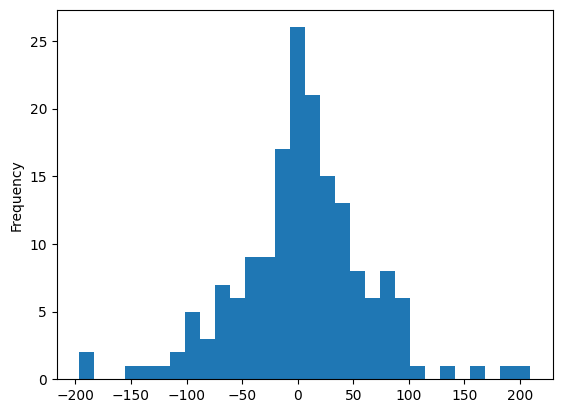

In [204]:
# Load the data files
images = pd.read_csv('data/ads-image.csv')
videos = pd.read_csv('data/ads-video.csv')

# Merge the two data files
data = pd.merge(images, videos, on='person_id', how='outer')
data.rename({'amount_spent_x': 'images', 'amount_spent_y': 'video'}, axis=1, inplace=True)

data

# Remove the rows with missing values
data_clean = data.copy()
data_clean.dropna(inplace=True)
data_clean['difference'] = data_clean.images - data_clean.video  # Calculate the difference between the two variables
data_clean.difference.plot.hist(bins=30)  # Plot the histogram of the difference variable

# Calculate the P-values for the images and video variables by using the Shapiro-Wilk test
print(data_clean[['images', 'video']].apply(stats.shapiro))
print(stats.shapiro(data_clean['difference']).pvalue)

# Calculate the P-value for paired and normally distributed by using the t-test
print(stats.ttest_rel(data_clean.images, data_clean.video).pvalue)

# Calculate the P-value for paired and non-normally distributed by using the Wilcoxon signed-rank test
print(stats.wilcoxon(data_clean.images, data_clean.video, correction=True).pvalue)

By looking the P-value of Shapiro-Wilk test, we can see that it is greater than the significancy level of 0.05, which suggest that the merged data is most likely normally distributed. This P-value cannot reject the null hypothesis.

When we are doing the T-test for the set, we can see that the P-value is grater than 0.05, which tells us that the there are no significant differences between values. 

As well the Wilcoxon ranking test shows that the P-value is greater than 0.05, which suggest that there are no statistically differences between these values.